# Systemy inspekcji wizualnej  
## Laboratorium  6 - Operacje morfologiczne
dr inż. Łukasz Jeleń

Nazwisko i Imię:  Michał Dams  
Nr albumu:  246783  
data wykonania ćwiczenia:  15.01.2023 

# 1. Narzędzia  
  
  
Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje. 

# 2. Zadania. 
  
## Zadanie 1 - Element strukturalny. 
  
Elemnt strukturalny definuje sąsiedztwo piksela, ktróre jest brane pod uwagę podczas wyznaczania operacji morfologicznych. Bazując na definicji operacji morfologicznej oraz rozmiarze i kształcie elemntu strukturalnego możemy odpowiednio modyfikować nasze obrazy. 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### a) Ręczne ustawienie elementu strukturalnego  
 
W tym przypadku sami określimy kwadratowy element strukturalny o rozmiarze $5x5$: `kernel = np.ones((5,5),np.uint8)`.  
  
Proszę o stworzenie elemntów o rozmiarach $3x3$,$5x5$,$7x7$,$1x1$ oraz wyświetlenie ich. 

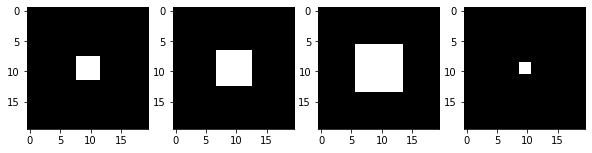

In [ ]:
dim = 20
kernel_sizes = (3, 5, 7, 1)

def create_blank_image(size):
  return np.zeros((size, size, 3), dtype = np.uint8)

def create_kernel(image, size):
  x = y = int(dim/2 - size/2)
  return cv2.rectangle(image, (x, y), (x + size, y + size), (255, 255, 255), -1)

plt.figure(figsize=(10,10))

for i, k in enumerate(kernel_sizes):
  img = create_blank_image(dim)
  img = create_kernel(img, k)
  plt.subplot(1, 4, i+1) 
  plt.imshow(img)

plt.show()

### b) getStructuringElement 
  
Często zdaża się, że kdratowy element strukturalny nie jest odpowiedni. W celu utworzenia elementu eliptycznego można wykorzystać wbudowaną funkcję OpenCV `cv.getStructuringElement()`, gdzie należy zdefiniować kształt oraz rozmiar jądra. Więcej informacji można przeczytać w dokumentacji [tutaj](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad) i [tutaj](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32) 


Proszę o stworzenie elemntów typu CROSS i ELLIPSE o rozmiarach $3x3$,$5x5$,$7x7$,$11x11$ oraz wyświetlenie ich. 

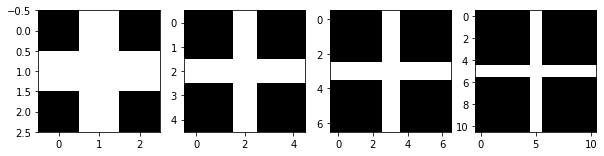

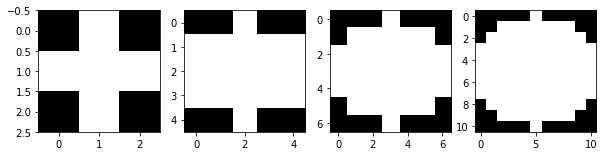

In [ ]:
cross = [cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size)) for size in [3, 5, 7, 11]]
ellipse = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size)) for size in [3, 5, 7, 11]]

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i, ax in enumerate(axes):
    ax.imshow(cross[i], cmap="gray")

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i, ax in enumerate(axes):
    ax.imshow(ellipse[i], cmap="gray")


## Zadanie 2 - Podstawowe operacje morfologiczne 

W zadaniach należy wykorzystać obraz utworzony na pierwszym laboratorium, bez szumu (obraz z liniami) oraz jeden z obrazów wykonanych w laboratorium). 
  
### a) Erozja 
  
Dla zadanych obrazów należy wykonać operację erozji dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

In [ ]:
cross = [cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size)) for size in [5, 7, 11]]
ellipse = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size)) for size in [5, 7, 11]]
rect = [cv2.getStructuringElement(cv2.MORPH_RECT, (size, size)) for size in [5, 7, 11]]

struct_elements = {
    0 : "cross",
    1 : "ellipse",
    2 : "rectangle"
}

kernel_dict = {
    0 : "5",
    1 : "7",
    2 : "11"
}

In [ ]:
img_paths = [
    "/content/linie.png",
    "/content/lab.jpg"
]
imgs = [cv2.imread(img_path) for img_path in img_paths]
grayscale_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]
binary_imgs = [cv2.threshold(grayscale_img, np.max(grayscale_img)//2, 255, cv2.THRESH_BINARY)[1] for grayscale_img in grayscale_imgs]

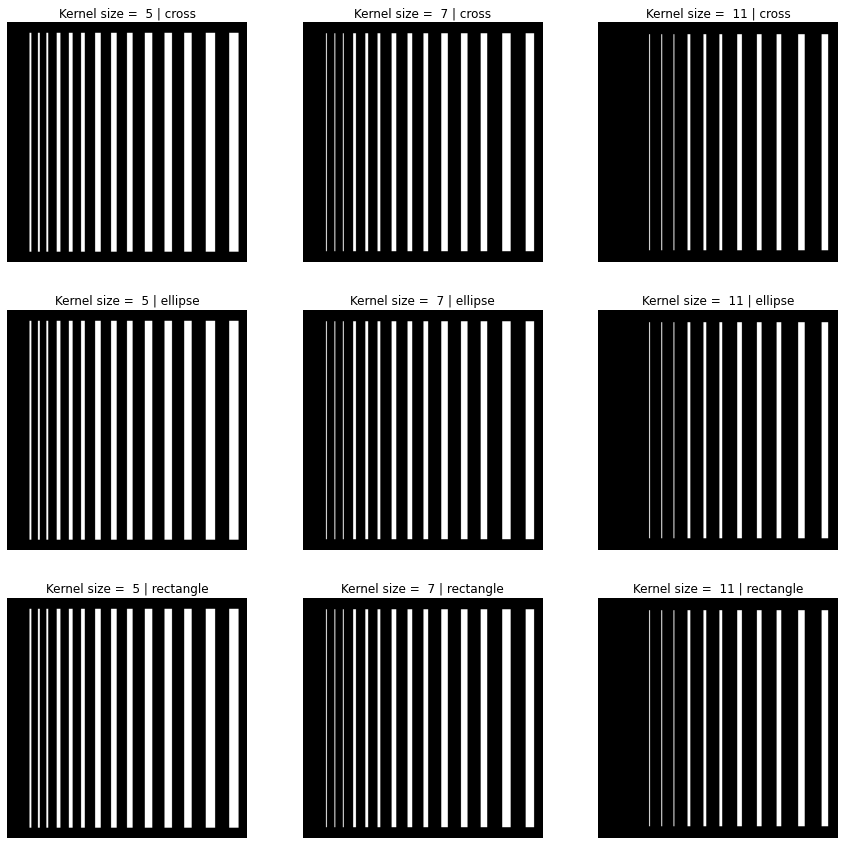

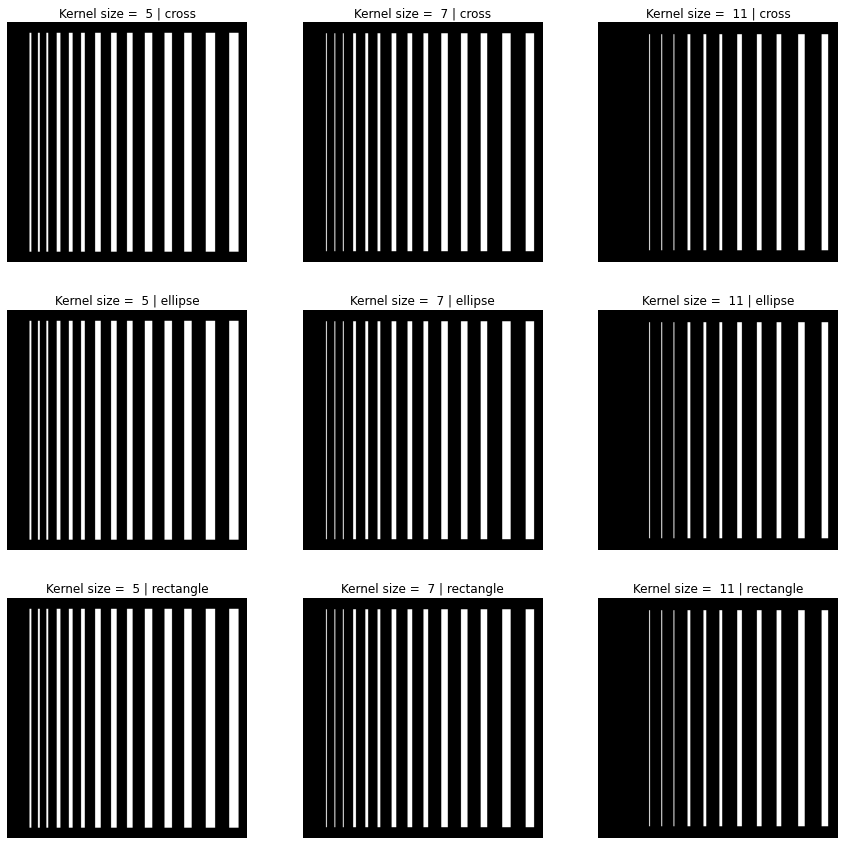

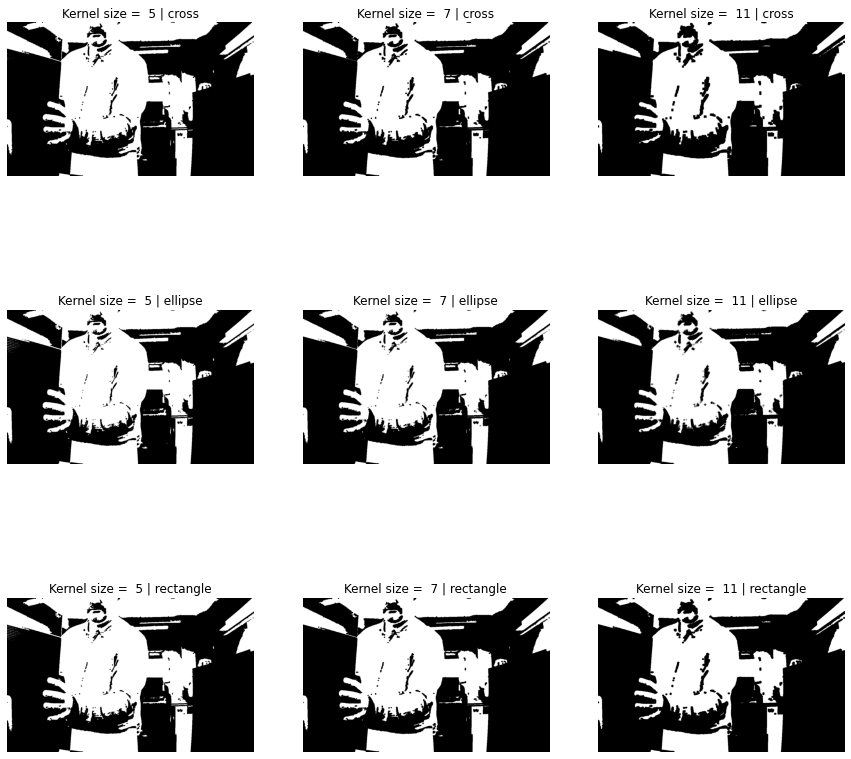

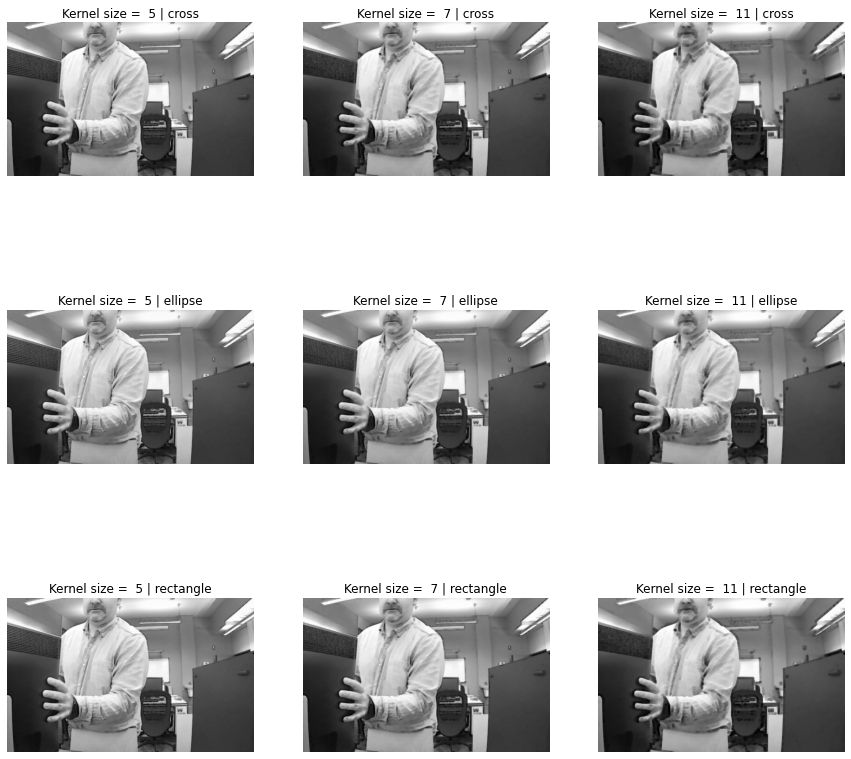

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.erode(binary_imgs[0], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.erode(grayscale_imgs[0], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.erode(binary_imgs[1], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.erode(grayscale_imgs[1], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

### b) Dylatacja 
  
Dla zadanych obrazów należy wykonać operację dylatacji dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

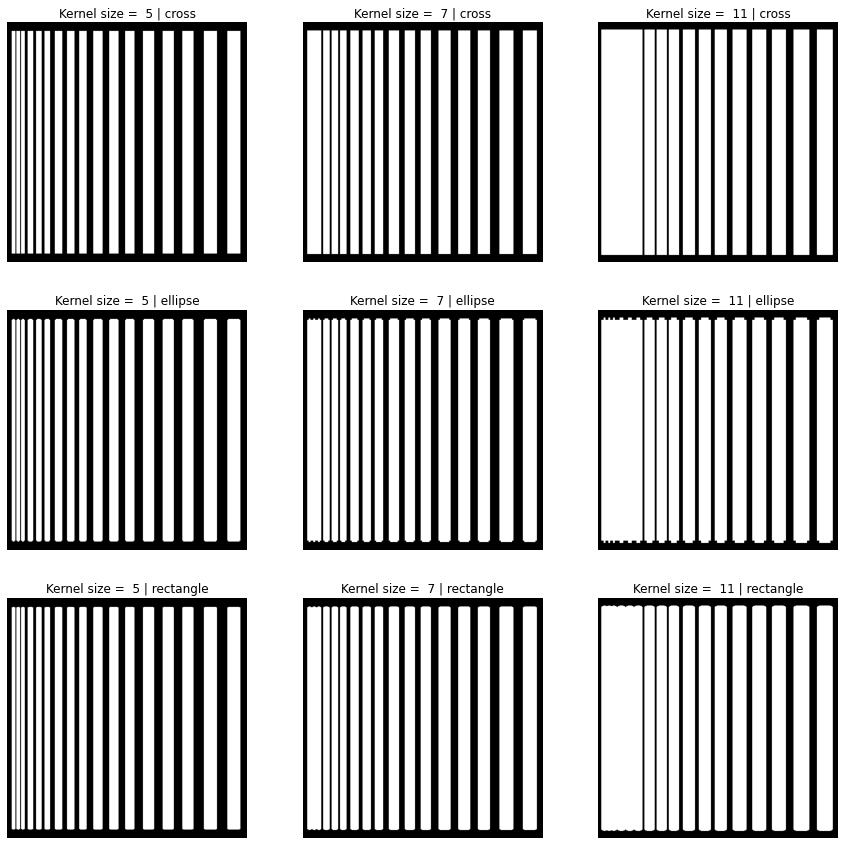

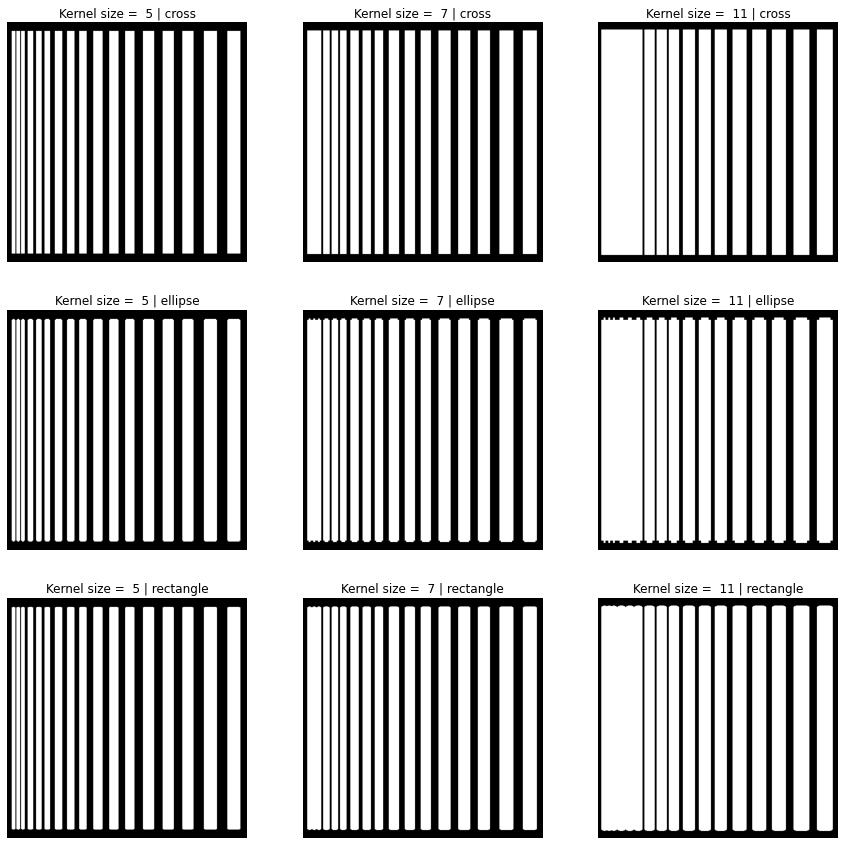

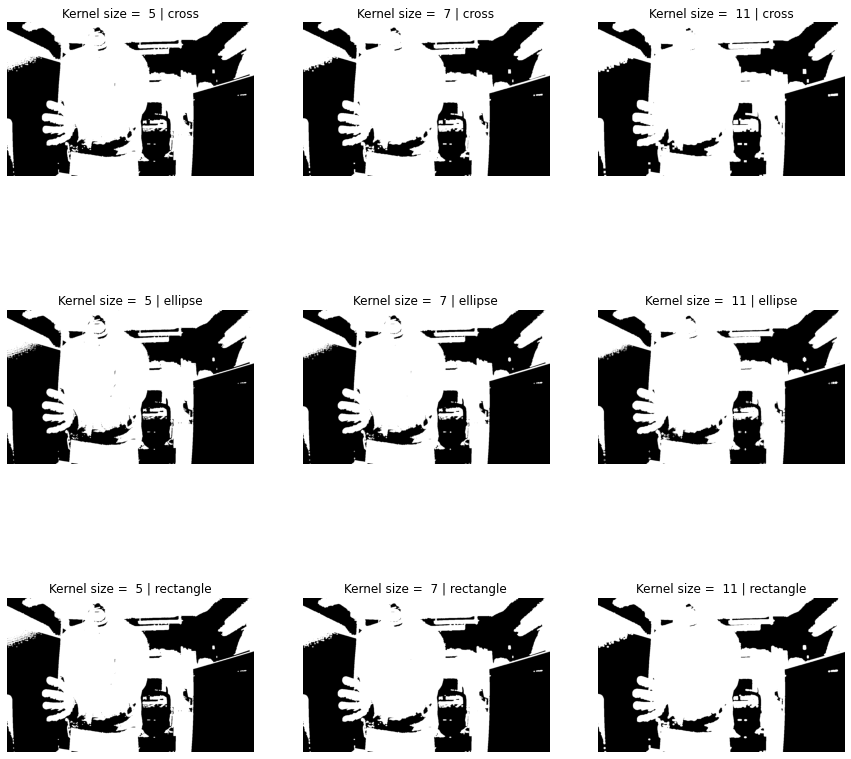

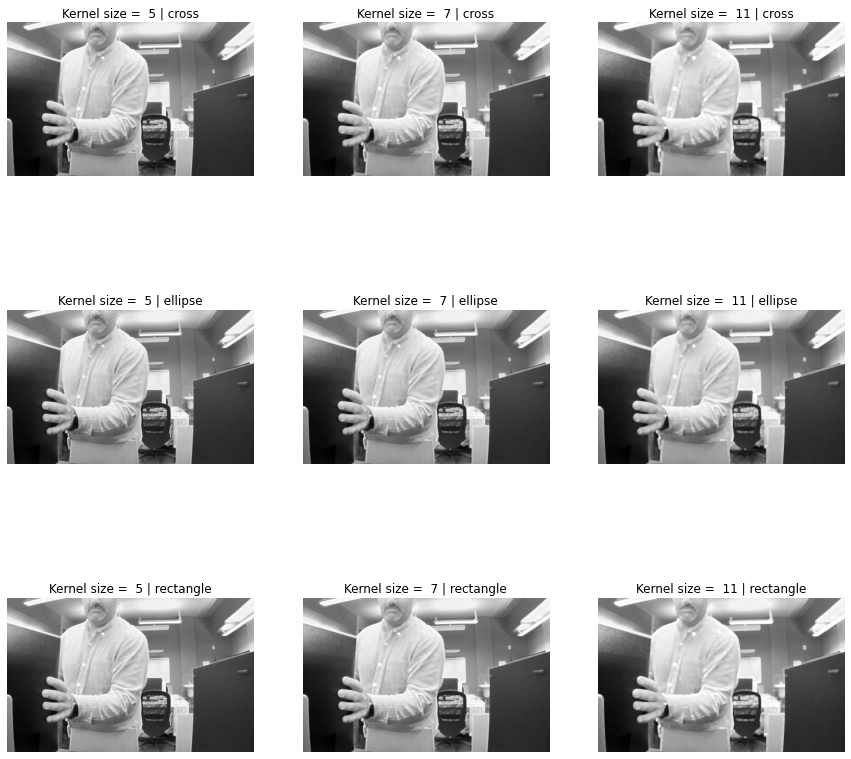

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.dilate(binary_imgs[0], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.dilate(grayscale_imgs[0], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.dilate(binary_imgs[1], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.dilate(grayscale_imgs[1], kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

### c) Otwarcie
  
Dla zadanych obrazów należy wykonać operację otwarcia dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

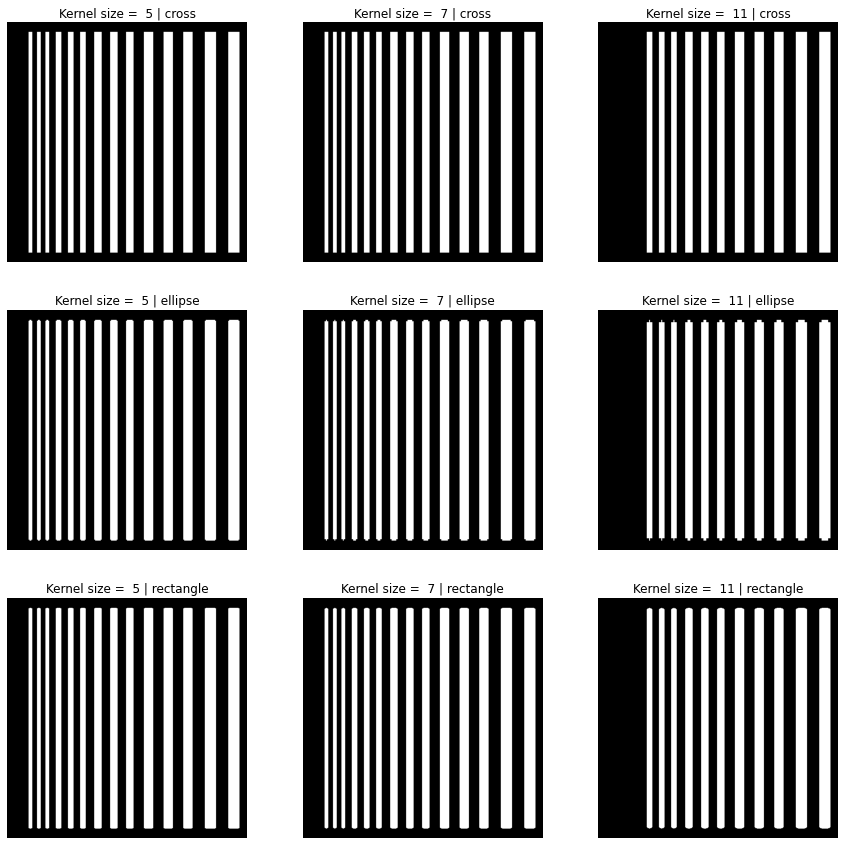

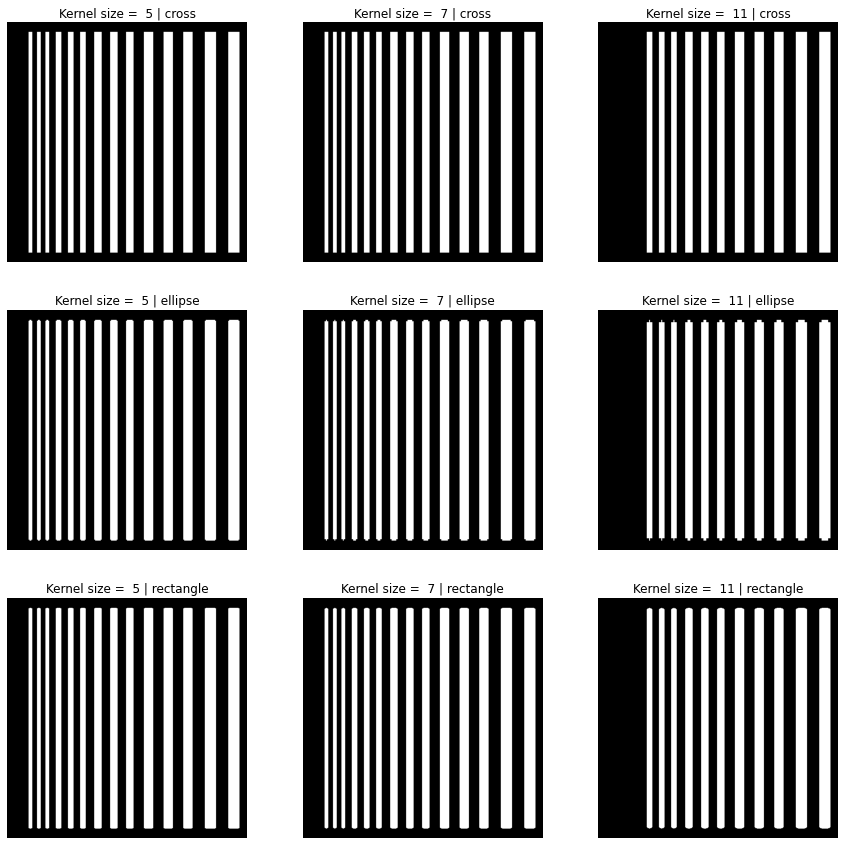

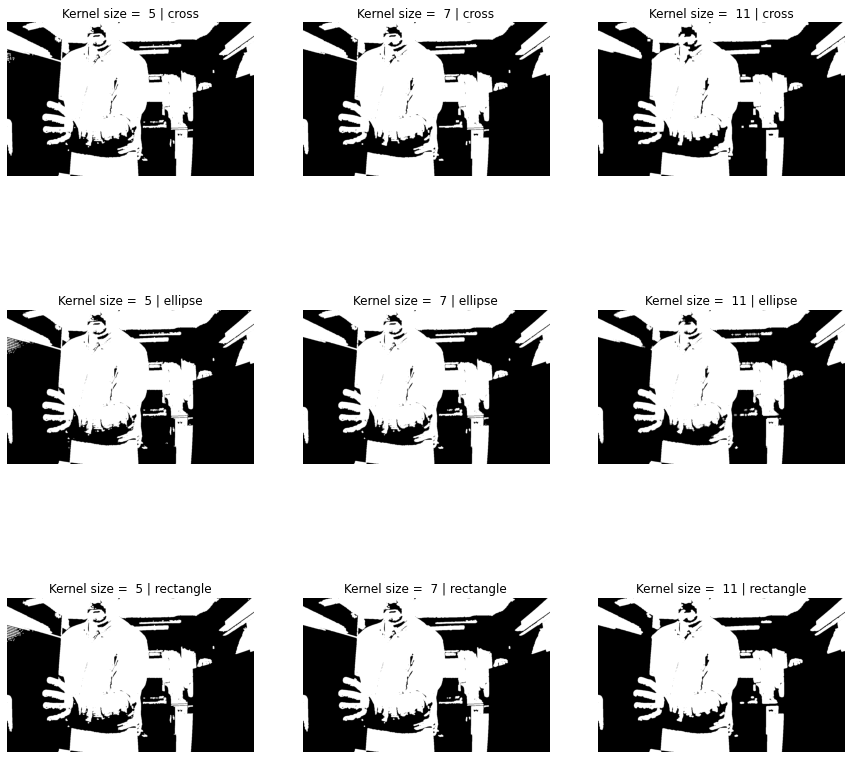

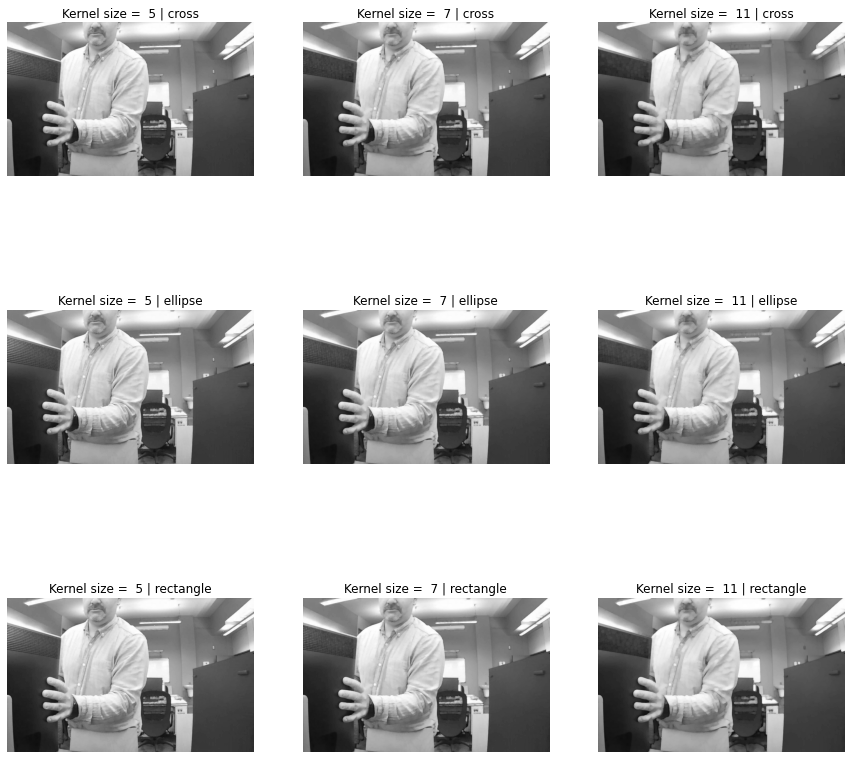

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[0], cv2.MORPH_OPEN,kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[0], cv2.MORPH_OPEN,kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[1], cv2.MORPH_OPEN,kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[1], cv2.MORPH_OPEN,kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")


### c) Zamknięcie  
  
Dla zadanych obrazów należy wykonać operację zamknięcia dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

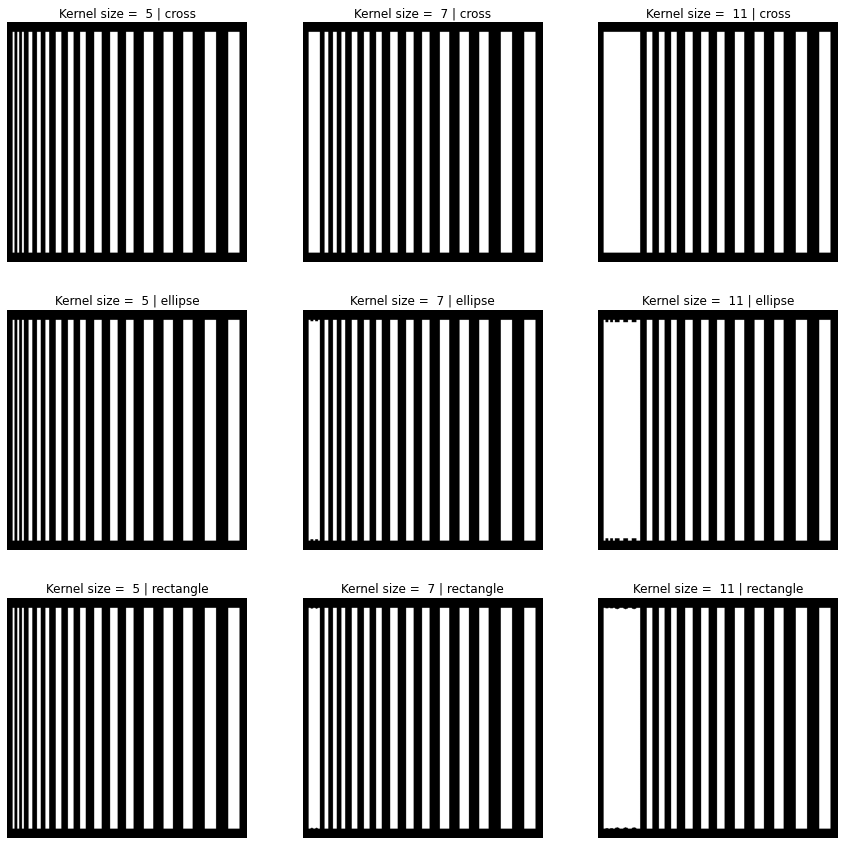

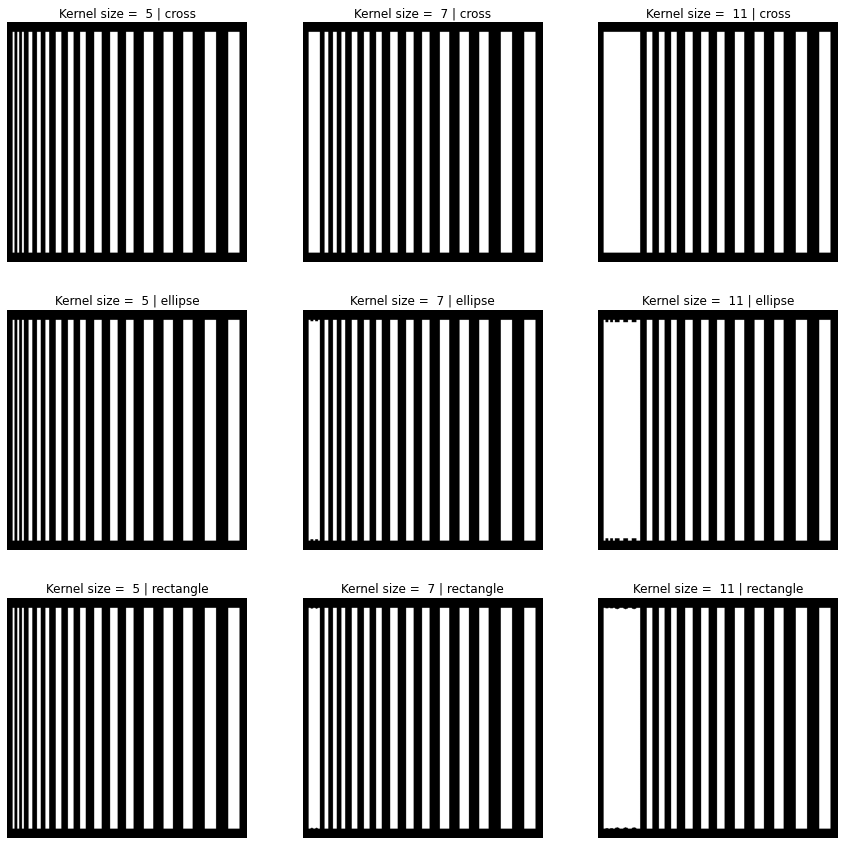

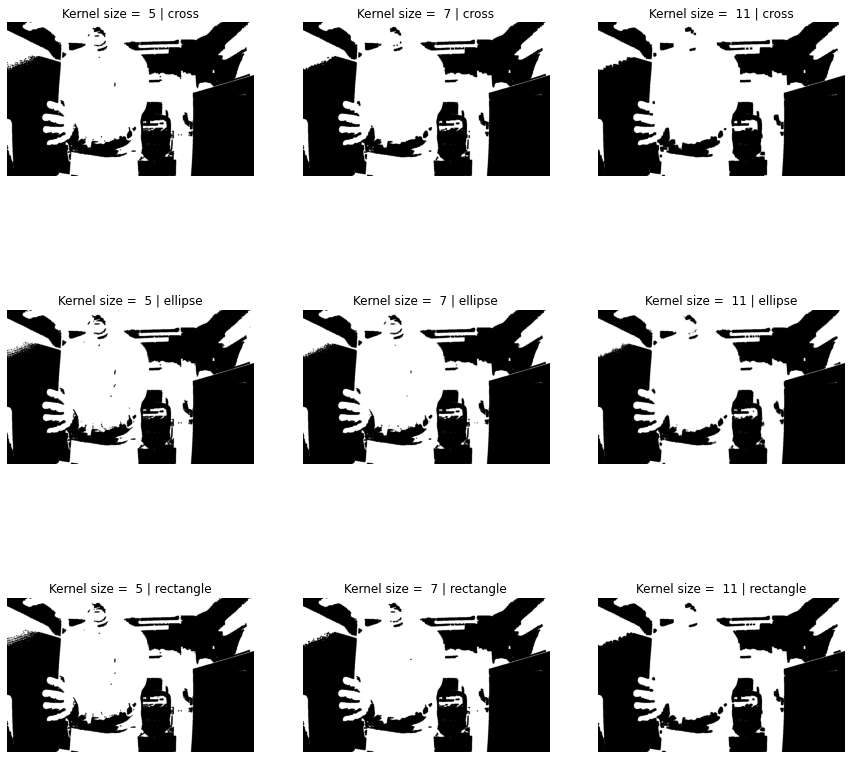

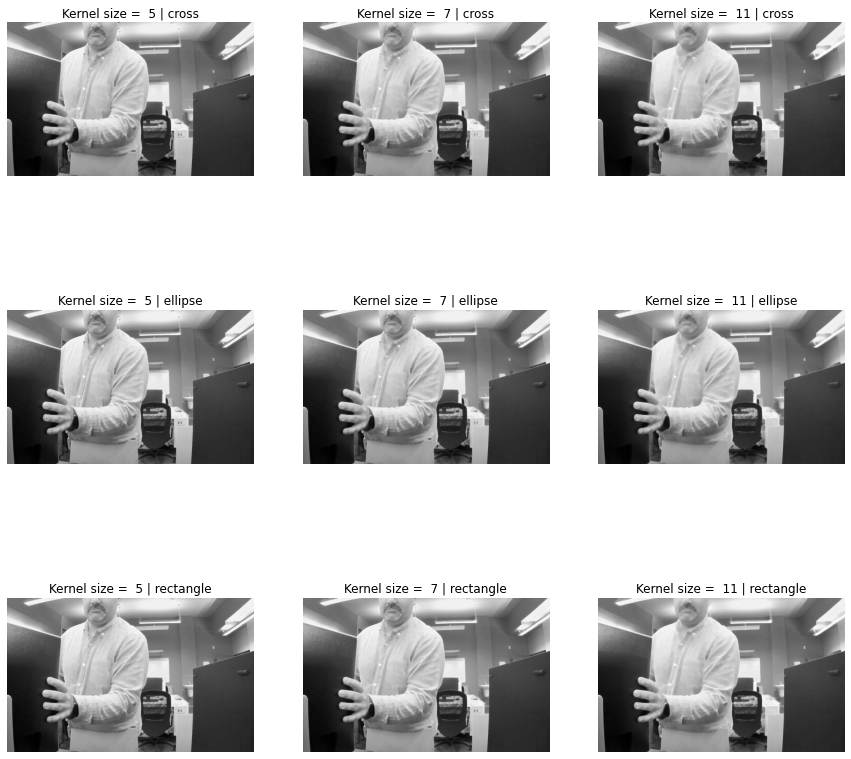

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[0], cv2.MORPH_CLOSE, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[0], cv2.MORPH_CLOSE, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[1], cv2.MORPH_CLOSE, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[1], cv2.MORPH_CLOSE, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")


## Zadanie 3 - Pozostałe operacje morfologiczne

W zadaniach należy wykorzystać obraz utworzony na pierwszym laboratorium, bez szumu (obraz z liniami) oraz jeden z obrazów wykonanych w laboratorium). 

### a) Gradient morfologiczny
  
Jest to różnica między diatacją i erozją, a wynikiem będzie obwiednia obiektu. 
  
Dla zadanych obrazów należy wykonać operację gradientu morfologicznego dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Można się zapoznać z dokumentacją [polecenia.](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

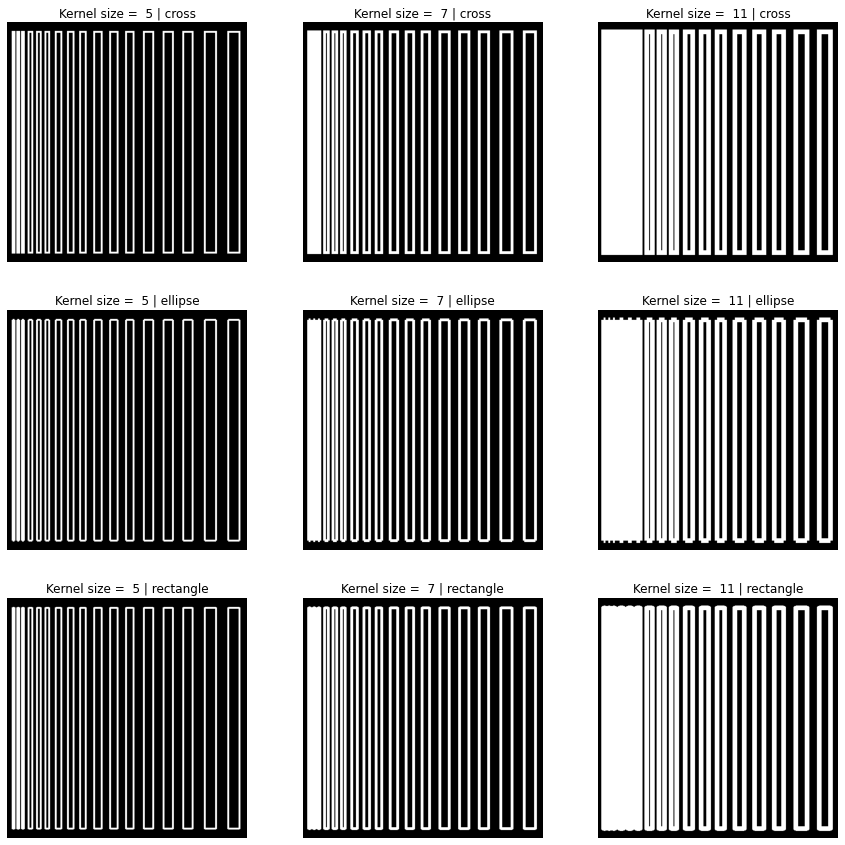

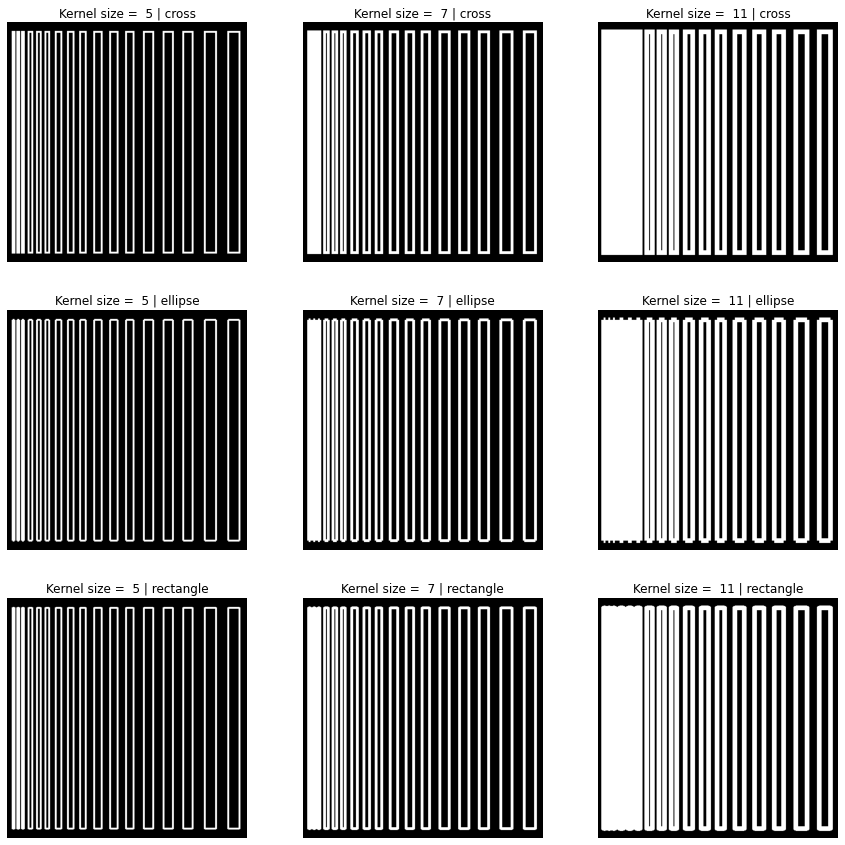

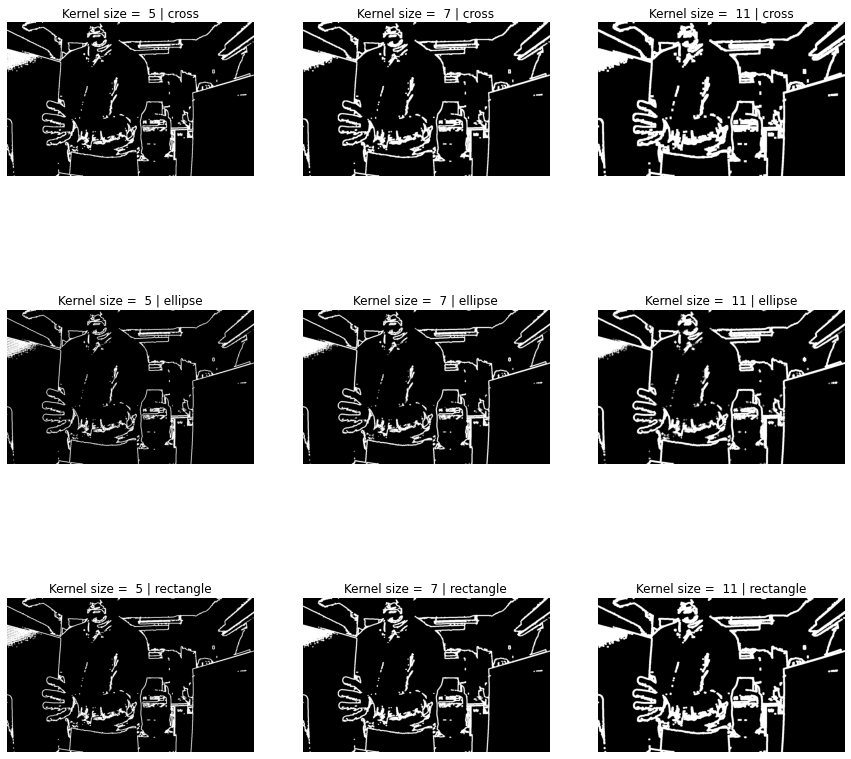

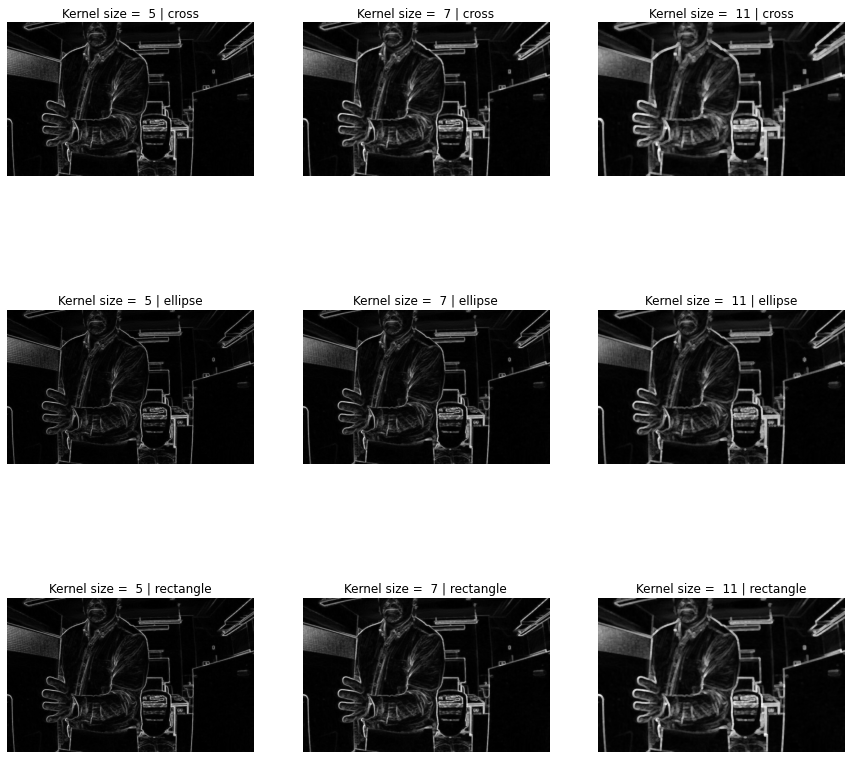

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[0], cv2.MORPH_GRADIENT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[0], cv2.MORPH_GRADIENT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[1], cv2.MORPH_GRADIENT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[1], cv2.MORPH_GRADIENT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")


### b) Top Hat
  
Operacja Top Hat jest różnicą między obrazem wejściowym a wynikiem operacji Otwracia. 
  
Dla zadanych obrazów należy wykonać operację Top Hat dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

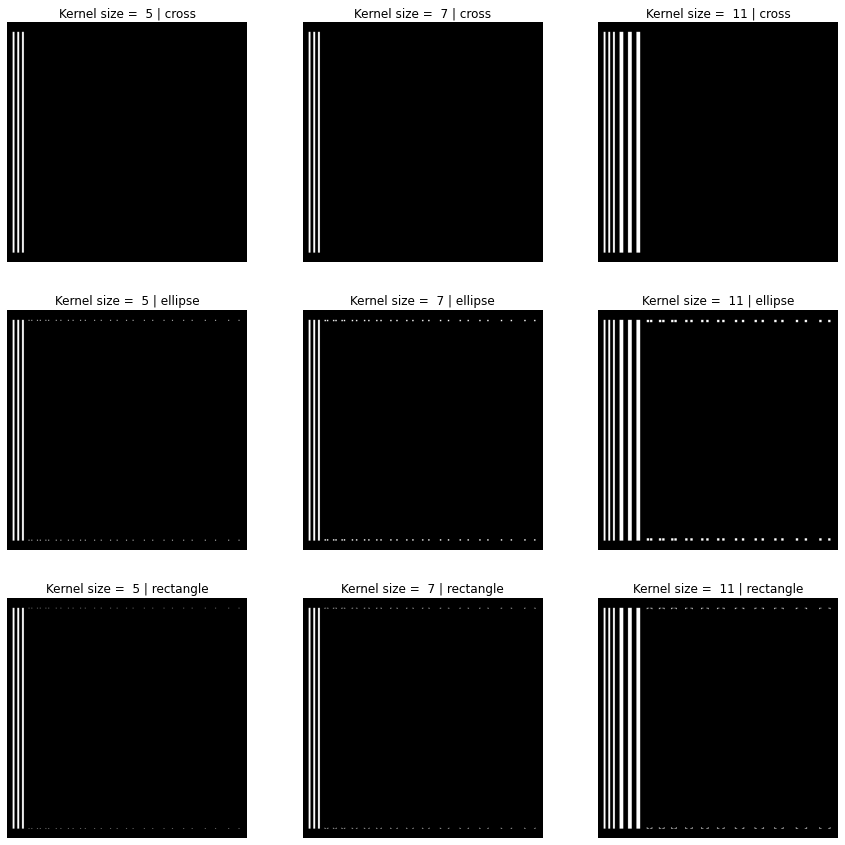

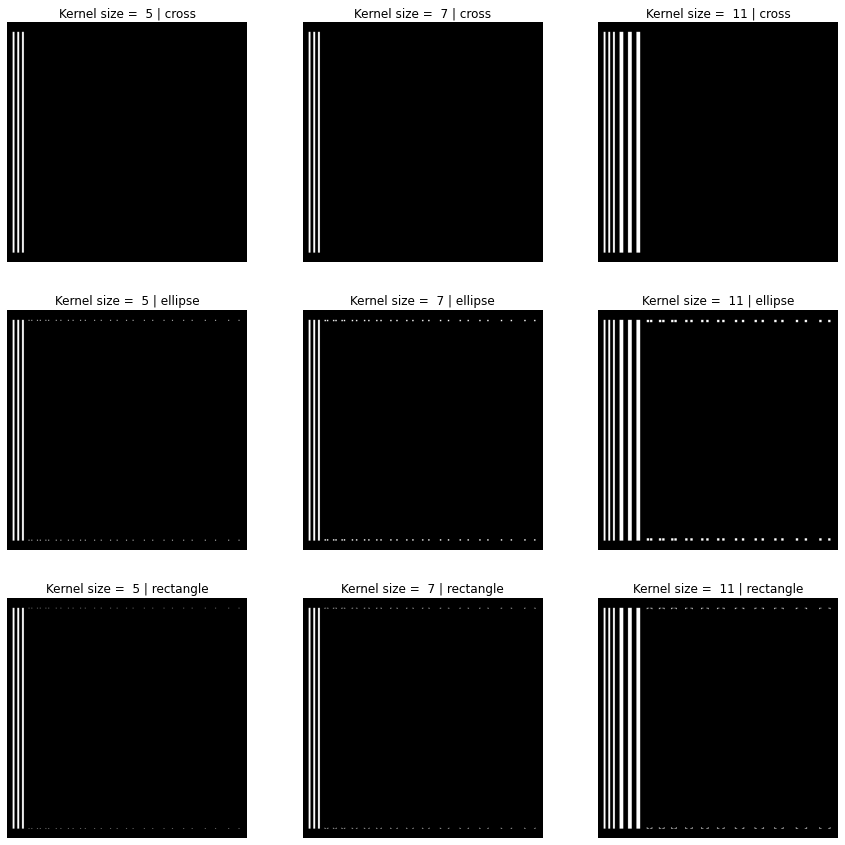

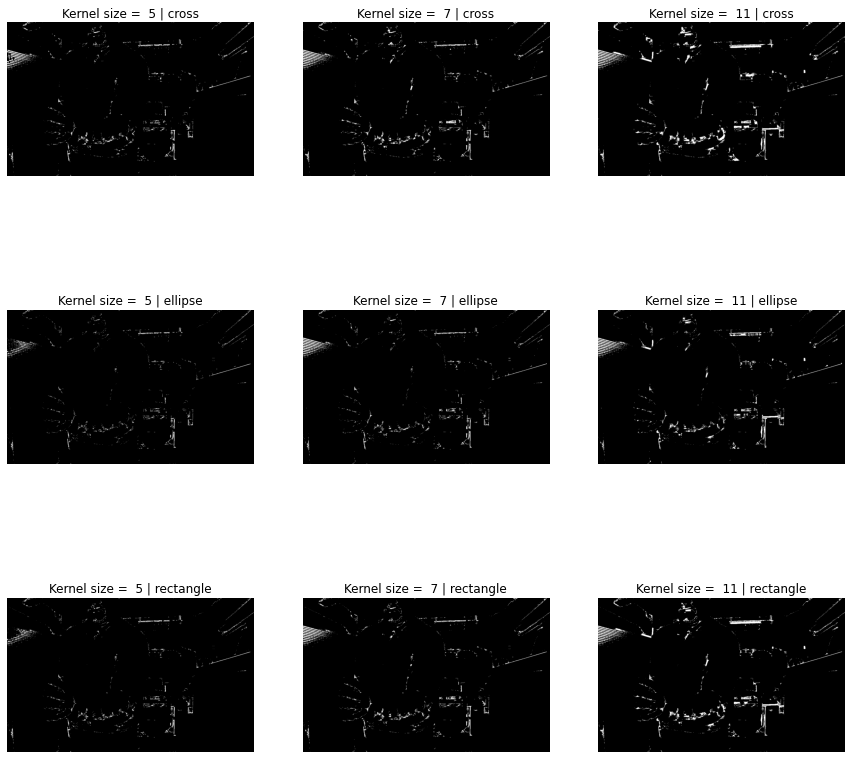

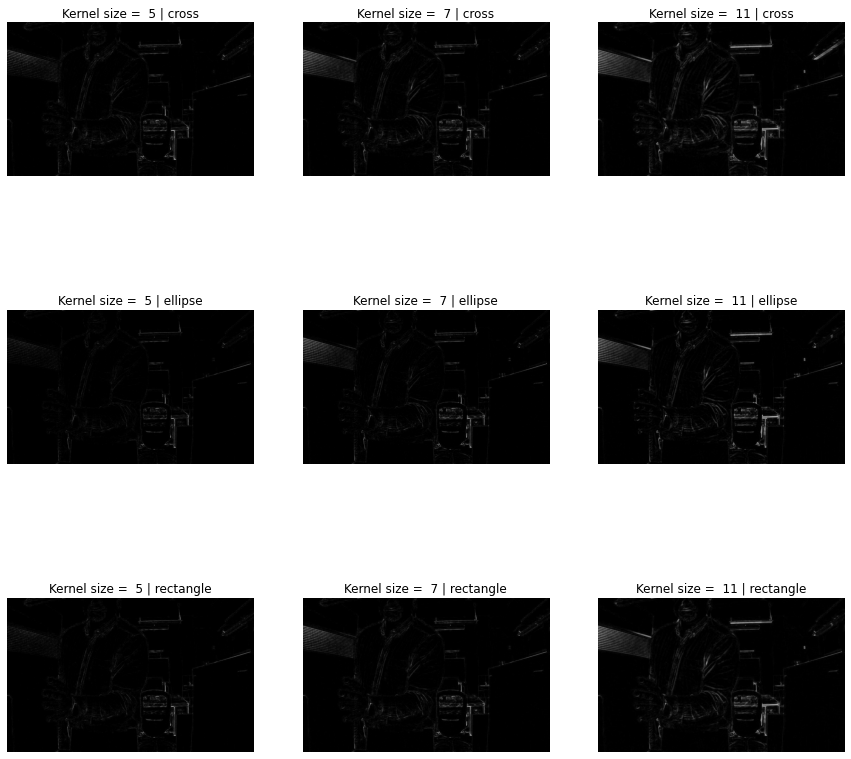

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[0], cv2.MORPH_TOPHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[0], cv2.MORPH_TOPHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[1], cv2.MORPH_TOPHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[1], cv2.MORPH_TOPHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

### c) Balck Hat
 
Operacja Black Hat jest różnicą między wynikiem operacji zamknięcia, a obrazem wejściowym. 
  
Dla zadanych obrazów należy wykonać operację Balck Hat dla 3 rodzai elementów strukturalnych oraz rozmiarów $5x5$,$7x7$,$11x11$. Proszę wykonać analizy dla obrazów binarnych oraz monochromatycznych. 

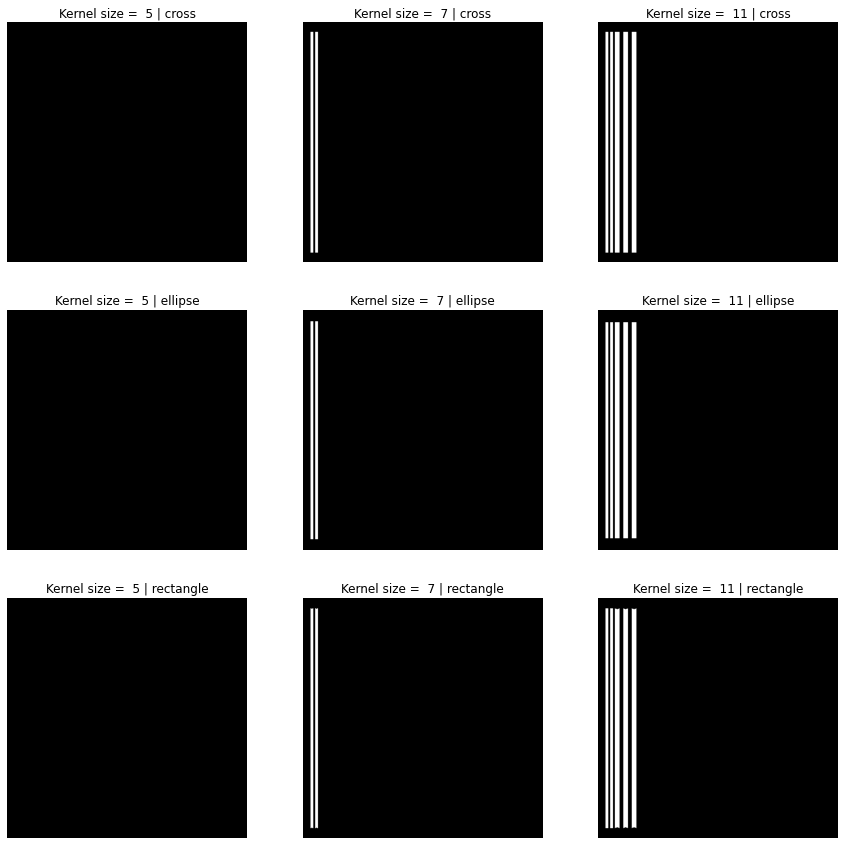

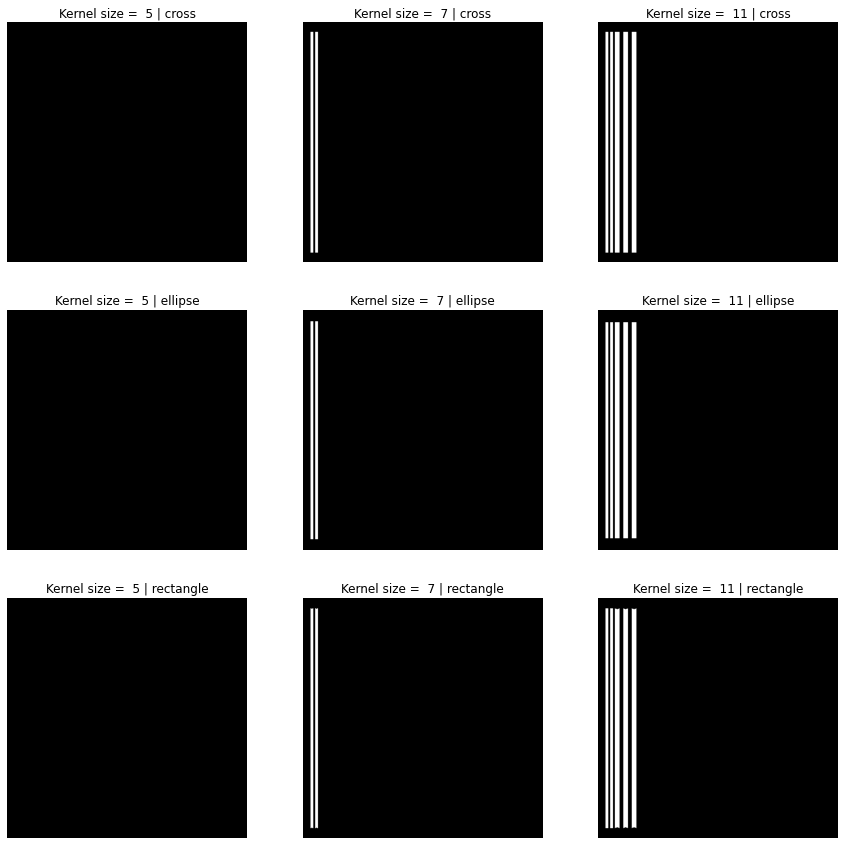

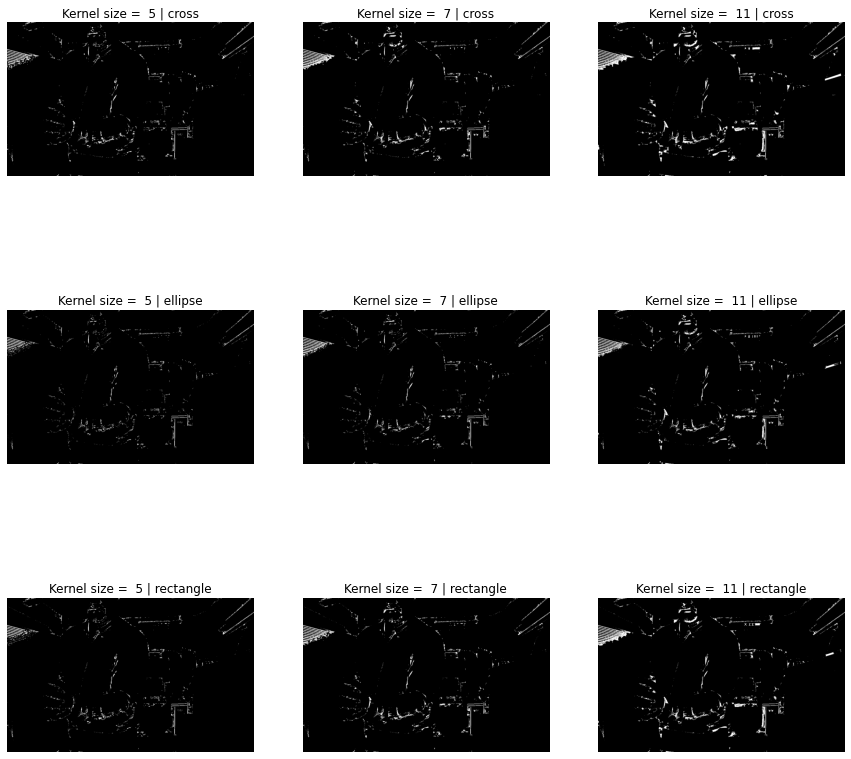

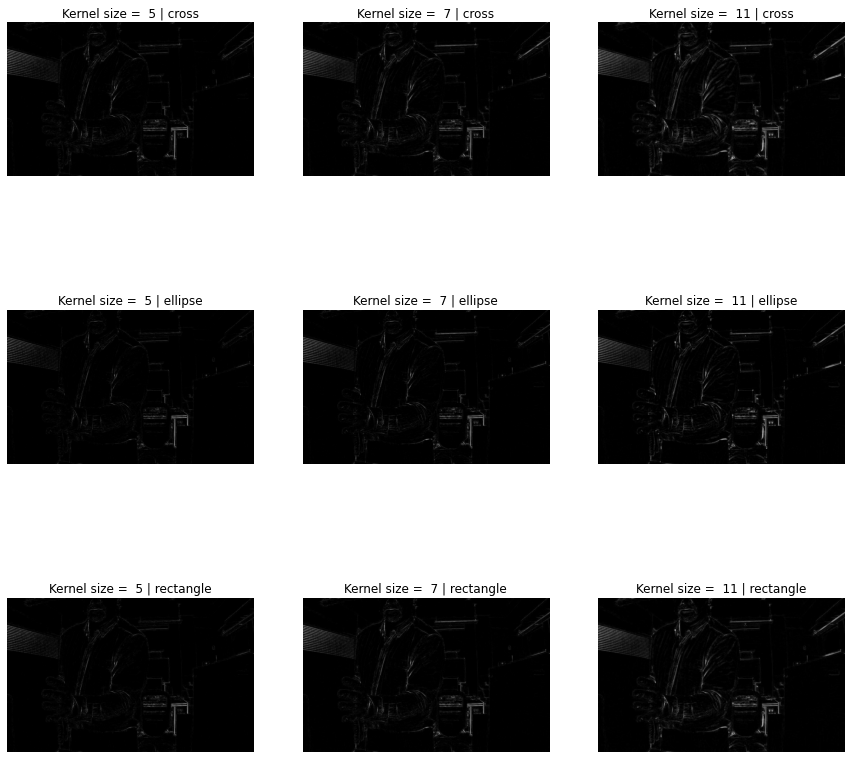

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[0], cv2.MORPH_BLACKHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[0], cv2.MORPH_BLACKHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(binary_imgs[1], cv2.MORPH_BLACKHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel_sizes in enumerate([rect, cross, ellipse]):
    for j, kernel in enumerate(kernel_sizes):
        img = cv2.morphologyEx(grayscale_imgs[1], cv2.MORPH_BLACKHAT, kernel, iterations=1)
        axes[i][j].imshow(img, cmap="gray")
        axes[i][j].axis('off')
        axes[i][j].set_title(f"Kernel size =  {kernel_dict[j]} | {struct_elements[i]}")